# Heuristics 
I will use simple heuristics to analyse the population and how different groups are responding to different offers. 

We already started slightly looking at different data distributions etc. in the exploratory analysis. However, here I will go a bit more into the behaviour of different groups. 

In the matrices I built, we have data about the user behaviour. We cannot determine if the user will respond to a specific offer with those data alone. However, we can look into if an offer in general increases spending. And which groups respond best overall. 

To take away the effect of duration of offers, I will use the time values to normalise the spending data. 

We'll start by investigating if gender by itself may influence the response to offers, followed by splitting data into age groups. Later we'll combine the user data and the offer data to look at which groups are responding best to the different offers, and if there are groups that are not really affected by any offers. 

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
offers = pd.read_pickle('offer_df.pkl')
users = pd.read_pickle('profile_expanded.pkl')

In [45]:
offers.head(2)

,offer_id,user_id,offer_type,difficulty,reward,start_time,duration,end_time,viewed,view_time,completed,complet_time,time_in_window,amount_in_window,type_bogo,type_discount,type_informational
0,2906b810c7d4411798c6938adc9daaa5,68be06ca386d4c31939f3a4f0e3dd783,discount,10,2,168,168,336,1,216.0,0,NaN,121,0.00,0,1,0
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,68be06ca386d4c31939f3a4f0e3dd783,discount,20,5,336,240,576,1,348.0,0,NaN,229,10.52,0,1,0


In [46]:
users.head(2)

,age,became_member_on,gender,income,user_id,spent_total,spent_in_window,spent_no_window,spent_in_discount,spent_in_bogo,...,time_in_bogo,time_in_informational,view_ratio,completion_ratio,view_and_complete_ratio,num_offers_received,gender_F,gender_M,gender_O,gender_nan
0,33,2017-04-21,M,72000.0,0009655768c64bdeb2e877511632db8f,127.60,30.73,96.87,0.0,0.0,...,1.0,111.0,0.4,0.6,0.0,5,0,1,0,0
1,118,2018-04-25,None,NaN,00116118485d4dfda04fdbaba9a87b5c,4.09,0.00,4.09,0.0,0.0,...,141.0,1.0,1.0,0.0,0.0,2,0,0,0,1


From the users dataframe we have more columns than what is useful to use in an analysis. The below subset is considered to be useful to answer questions about the users. 

In [47]:
# times = ['time_in_window', 'time_no_window', 'time_in_discount', 'time_in_bogo', 'time_in_informational']
# users.loc[:,times]  = np.array(users.loc[:,times]) +1 
users = users.drop(index=users.loc[users['time_no_window']<0,'user_id'].index)
users.loc[users['gender'].isna(),'gender'] ='N'
users.columns


Index(['age', 'became_member_on', 'gender', 'income', 'user_id', 'spent_total',
       'spent_in_window', 'spent_no_window', 'spent_in_discount',
       'spent_in_bogo', 'spent_in_informational', 'time_in_window',
       'time_no_window', 'time_in_discount', 'time_in_bogo',
       'time_in_informational', 'view_ratio', 'completion_ratio',
       'view_and_complete_ratio', 'num_offers_received', 'gender_F',
       'gender_M', 'gender_O', 'gender_nan'],
      dtype='object')

In [127]:
subset = ['gender', 'age', 'income', 'spent_total', 'spent_in_window', 'spent_no_window', 'spent_in_discount',
       'spent_in_bogo', 'spent_in_informational', 'time_in_window',
       'time_no_window', 'time_in_discount', 'time_in_bogo',
       'time_in_informational', 'view_ratio', 'completion_ratio', 'view_and_complete_ratio']
subset_min = ['gender', 'spent_total', 'spent_in_window', 'spent_no_window', 'time_in_window',
       'time_no_window',]
subset_min_spec = ['gender', 'spent_in_discount',
       'spent_in_bogo', 'spent_in_informational', 'time_in_discount', 'time_in_bogo',
       'time_in_informational']

In [49]:
users_sub = users.loc[:,subset]

users_sub.head(3)

,gender,age,income,spent_total,spent_in_window,spent_no_window,spent_in_discount,spent_in_bogo,spent_in_informational,time_in_window,time_no_window,time_in_discount,time_in_bogo,time_in_informational,view_ratio,completion_ratio,view_and_complete_ratio
0,M,33,72000.0,127.60,30.73,96.87,0.00,0.00,30.73,111.0,605.0,1.0,1.0,111.0,0.4,0.6,0.0
1,N,118,NaN,4.09,0.00,4.09,0.00,0.00,0.00,141.0,575.0,1.0,141.0,1.0,1.0,0.0,0.0
2,O,40,57000.0,79.46,33.98,45.48,33.98,22.05,0.00,359.0,357.0,213.0,62.0,147.0,1.0,0.6,0.6


In [50]:
users_sub.describe()

,age,income,spent_total,spent_in_window,spent_no_window,spent_in_discount,spent_in_bogo,spent_in_informational,time_in_window,time_no_window,time_in_discount,time_in_bogo,time_in_informational,view_ratio,completion_ratio,view_and_complete_ratio
count,16911.000000,14825.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000
mean,62.239489,65404.991568,104.987994,40.067959,64.920035,17.248089,17.850937,7.909153,231.722666,484.277334,106.793685,103.498847,35.752528,0.692762,0.442738,0.314543
std,26.503506,21598.299410,126.024807,59.745362,98.545746,40.008391,41.224502,26.183562,153.799196,153.799196,126.978657,103.779360,48.544984,0.252338,0.338879,0.282133
min,18.000000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,45.000000,49000.000000,22.235000,10.910000,6.990000,0.000000,0.000000,0.000000,112.000000,388.000000,1.000000,8.000000,1.000000,0.500000,0.166667,0.000000
50%,58.000000,64000.000000,70.050000,26.770000,32.210000,9.200000,9.870000,0.000000,208.000000,508.000000,57.000000,86.000000,1.000000,0.750000,0.500000,0.250000
75%,73.000000,80000.000000,149.365000,53.310000,93.090000,23.370000,24.450000,3.490000,328.000000,604.000000,170.000000,160.000000,68.000000,1.000000,0.750000,0.500000
max,118.000000,120000.000000,1608.690000,1073.510000,1344.930000,1307.200000,1136.810000,777.470000,715.000000,715.000000,807.000000,641.000000,359.000000,1.000000,1.000000,1.000000


In [51]:
users_sub_min = users.loc[:,subset_min]

In [52]:
users.loc[users['time_no_window']<0,'user_id']

Series([], Name: user_id, dtype: object)

From the above summary we can observe a couple of important things. First of all, the min and max values gives indications of obvious outliers or erronous data. However, it look reasonable for most at least. 

Secondly we can observe that the mean and median are very different in some of the parameters. 

In [53]:
idx = pd.IndexSlice
users_sub_min.groupby(['gender']).describe().transpose().loc[idx[:,idx['mean', '50%']],:]

gender                         F           M           N           O
spent_total     mean  140.919400   99.586381   19.419736  124.323302
                50%   116.560000   63.070000   15.715000   93.440000
spent_in_window mean   50.671880   38.639815   13.751170   49.604623
                50%    38.590000   26.395000   10.175000   33.685000
spent_no_window mean   90.247520   60.946566    5.668567   74.718679
                50%    68.020000   27.235000    3.700000   50.150000
time_in_window  mean  187.513624  229.990453  370.007191  218.476415
                50%   160.000000  213.000000  370.000000  198.500000
time_no_window  mean  528.486376  486.009547  345.992809  497.523585
                50%   556.000000  503.000000  346.000000  517.500000

In the above table we see the mean and the median (50%) for all the users split by gender. N is unknown gender and O is other. One thing to note about the mean and median; If the mean and median is significantly different, it means that a few users are having quite extreme values, driving the mean to change from the mean. 

In the above summary we can see that for all of the spending parameters, the median is significantly lower than the mean. Thus, there are a solid minority doing some serious spending compared to the middle spender. The same is true for the time_in_window which describes the total time a user spend after viewing an offer. 

However, lets drill a bit further. The spending amount is not that interesting as it is now by itself. Every user receives different types of offers, some offers are more common and have longer duration etc. which affect the time the user has to spend their money inside a specific offer. Thus, I will normalise the spendings by dividing by the respective time in window. 

Since the window is defined as from the offer is viewed to the offer is completed or expired, normalising with the time_in_window will also given an extra boost to those responding fast to offers, making it a powerful metric to identify the most eager ones. 

In [54]:
users['spent_in_window_norm'] = users.loc[:,'spent_in_window']/users['time_in_window']
users['spent_no_window_norm'] = users.loc[:,'spent_no_window']/users['time_no_window']
users['spent_in_discount_norm'] = users.loc[:,'spent_in_discount']/users['time_in_discount']
users['spent_in_bogo_norm'] = users.loc[:,'spent_in_bogo']/users['time_in_bogo']
users['spent_in_informational_norm'] = users.loc[:,'spent_in_informational']/users['time_in_informational']
users.head()

,age,became_member_on,gender,income,user_id,spent_total,spent_in_window,spent_no_window,spent_in_discount,spent_in_bogo,...,num_offers_received,gender_F,gender_M,gender_O,gender_nan,spent_in_window_norm,spent_no_window_norm,spent_in_discount_norm,spent_in_bogo_norm,spent_in_informational_norm
0,33,2017-04-21,M,72000.0,0009655768c64bdeb2e877511632db8f,127.60,30.73,96.87,0.00,0.00,...,5,0,1,0,0,0.276847,0.160116,0.000000,0.000000,0.276847
1,118,2018-04-25,N,NaN,00116118485d4dfda04fdbaba9a87b5c,4.09,0.00,4.09,0.00,0.00,...,2,0,0,0,1,0.000000,0.007113,0.000000,0.000000,0.000000
2,40,2018-01-09,O,57000.0,0011e0d4e6b944f998e987f904e8c1e5,79.46,33.98,45.48,33.98,22.05,...,5,0,0,1,0,0.094652,0.127395,0.159531,0.355645,0.000000
3,59,2016-03-04,F,90000.0,0020c2b971eb4e9188eac86d93036a77,196.86,34.87,161.99,17.63,17.24,...,5,1,0,0,0,0.270310,0.275963,0.400682,0.200465,0.000000
4,24,2016-11-11,F,60000.0,0020ccbbb6d84e358d3414a3ff76cffd,154.05,95.37,58.68,11.65,24.85,...,4,1,0,0,0,0.532793,0.109274,0.208036,0.487255,0.795541


In [55]:
users.columns

Index(['age', 'became_member_on', 'gender', 'income', 'user_id', 'spent_total',
       'spent_in_window', 'spent_no_window', 'spent_in_discount',
       'spent_in_bogo', 'spent_in_informational', 'time_in_window',
       'time_no_window', 'time_in_discount', 'time_in_bogo',
       'time_in_informational', 'view_ratio', 'completion_ratio',
       'view_and_complete_ratio', 'num_offers_received', 'gender_F',
       'gender_M', 'gender_O', 'gender_nan', 'spent_in_window_norm',
       'spent_no_window_norm', 'spent_in_discount_norm', 'spent_in_bogo_norm',
       'spent_in_informational_norm'],
      dtype='object')

In [56]:
users.loc[:,['spent_in_window_norm', 'spent_no_window_norm', 'spent_in_discount_norm', 'spent_in_bogo_norm', 'spent_in_informational_norm']] = users.loc[:,['spent_in_window_norm', 'spent_no_window_norm', 'spent_in_discount_norm', 'spent_in_bogo_norm', 'spent_in_informational_norm']].fillna(0)

In [57]:
users.loc[users['spent_in_window_norm']==np.inf,['time_in_window', 'spent_in_window']]

,time_in_window,spent_in_window


Create a new subset with our new features

In [133]:
subset2 = ['gender', 'age', 'income', 'spent_total', 'spent_in_window_norm', 'spent_no_window_norm', 'spent_in_discount_norm',
           'spent_in_bogo_norm', 'spent_in_informational_norm', 'view_ratio', 'completion_ratio',
           'view_and_complete_ratio']
subset2_min = ['gender', 'spent_in_window_norm', 'spent_no_window_norm']
subset2_min_spec = ['gender', 'spent_no_window_norm', 'spent_in_discount_norm',
           'spent_in_bogo_norm', 'spent_in_informational_norm']

In [59]:
users_sub_norm = users.loc[:,subset2]
users_sub_norm_min = users.loc[:,subset2_min]
users_sub_norm.head()

,gender,age,income,spent_total,spent_in_window_norm,spent_no_window_norm,spent_in_discount_norm,spent_in_bogo_norm,spent_in_informational_norm,view_ratio,completion_ratio,view_and_complete_ratio
0,M,33,72000.0,127.60,0.276847,0.160116,0.000000,0.000000,0.276847,0.4,0.60,0.00
1,N,118,NaN,4.09,0.000000,0.007113,0.000000,0.000000,0.000000,1.0,0.00,0.00
2,O,40,57000.0,79.46,0.094652,0.127395,0.159531,0.355645,0.000000,1.0,0.60,0.60
3,F,59,90000.0,196.86,0.270310,0.275963,0.400682,0.200465,0.000000,0.4,0.60,0.40
4,F,24,60000.0,154.05,0.532793,0.109274,0.208036,0.487255,0.795541,1.0,0.75,0.75


With our new subset of the user matrix I would then like to try to create some statistics. First let's see if it makes sense. 

In [60]:
users_sub_norm.describe()

,age,income,spent_total,spent_in_window_norm,spent_no_window_norm,spent_in_discount_norm,spent_in_bogo_norm,spent_in_informational_norm,view_ratio,completion_ratio,view_and_complete_ratio
count,16911.000000,14825.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000
mean,62.239489,65404.991568,104.987994,0.498177,0.119122,0.584874,0.694390,0.103218,0.692762,0.442738,0.314543
std,26.503506,21598.299410,126.024807,5.024485,0.183755,2.026252,5.830843,0.432963,0.252338,0.338879,0.282133
min,18.000000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,49000.000000,22.235000,0.037295,0.017057,0.000000,0.000000,0.000000,0.500000,0.166667,0.000000
50%,58.000000,64000.000000,70.050000,0.135183,0.070042,0.049623,0.065354,0.000000,0.750000,0.500000,0.250000
75%,73.000000,80000.000000,149.365000,0.413729,0.169868,0.354336,0.361429,0.048239,1.000000,0.750000,0.500000
max,118.000000,120000.000000,1608.690000,435.755000,7.650000,55.659286,435.755000,22.350000,1.000000,1.000000,1.000000


In [70]:
idx = pd.IndexSlice
users_sub_norm_min.groupby(['gender']).describe().transpose().loc[idx[:,idx['mean', '50%']],:]

gender                            F         M         N         O
spent_in_window_norm mean  0.746631  0.426868  0.046653  0.611773
                     50%   0.280000  0.127183  0.028474  0.220850
spent_no_window_norm mean  0.159942  0.112978  0.022164  0.138906
                     50%   0.127740  0.060976  0.011346  0.104117

With our normalised parameters we can see even clearer that there are some users that spend much than the rest per hour they spend in a valid window. 

It is also clear to see that the both the mean and median spending in a valid window is almost double that of spendings per hour outside of valid windows. 

Looking at the mean; Women have a much higher spending per hour, both inside and outside the valid windows. The spending per hour is about double for woment than men in the windows. Only "other" can come close. We can also see that the ratio of spending per hour in and out of windows is many times higher for women than any other gender. The numbers are slighly less extreme when we use the median instead, and the jump from out of window to in window is more similar across all genders. However, they are still quite clear indications. 

We can also see that the mean spendings during bogo and discount offers are significantly higher than the informational offers. In fact, at least 50% of the users never spend any money during the period after seeing a informational offer. 

Due to double booking when we have overlapping offers, we cannot compare the values of the offers directly to the ones regarding windows in general.

Further we see that the view ratio is quite similar across genders, with the default users and "other" actually having a higher value. However, this can be for several reasons as the number of users in these groups are relatively small. 

The general completion rate, and the intentional completion rate are both lower for men than for women and significantly lower than "other". 

Let's try to visualise these findings

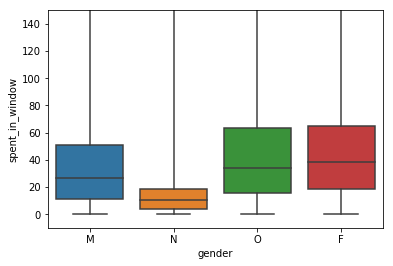

In [62]:
#spent in window broken down
sns.boxplot(x='gender', y='spent_in_window', data=users_sub,whis="range")
plt.ylim(-10,150);
plt.savefig('plots/spent_in_window.png')


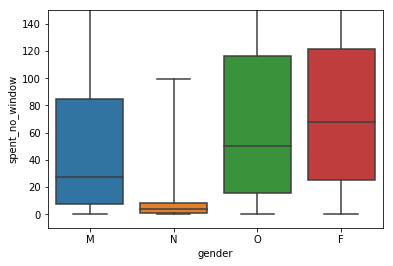

In [63]:
sns.boxplot(x='gender', y='spent_no_window', data=users_sub,whis="range")
plt.ylim(-10,150);
plt.savefig('plots/spent_no_window.png')


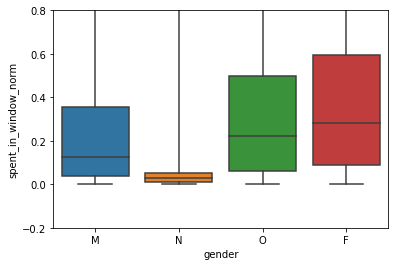

In [64]:
sns.boxplot(x='gender', y='spent_in_window_norm', data=users_sub_norm,whis="range")
plt.savefig('plots/spent_in_window_norm.png')
plt.ylim(-0.2,0.8);

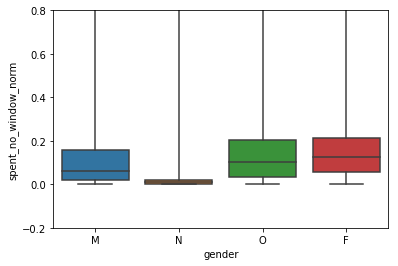

In [65]:
sns.boxplot(x='gender', y='spent_no_window_norm', data=users_sub_norm,whis="range")
plt.savefig('plots/spent_no_window_norm.png')
plt.ylim(-0.2,.8);

C:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


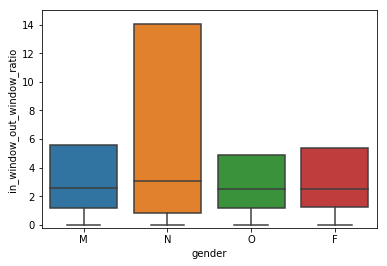

In [66]:
users_sub_norm['in_window_out_window_ratio'] = np.array(users_sub_norm['spent_in_window_norm'])/np.array(users_sub_norm['spent_no_window_norm'])
sns.boxplot(x='gender', y='in_window_out_window_ratio', data=users_sub_norm,whis="range")
plt.savefig('plots/in_window_out_window_ratio.png')
plt.ylim(-0.2,15);

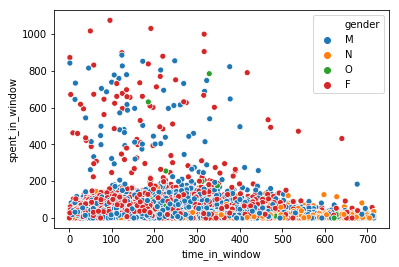

In [67]:
sns.scatterplot(x='time_in_window', y='spent_in_window', hue='gender', data=users_sub)

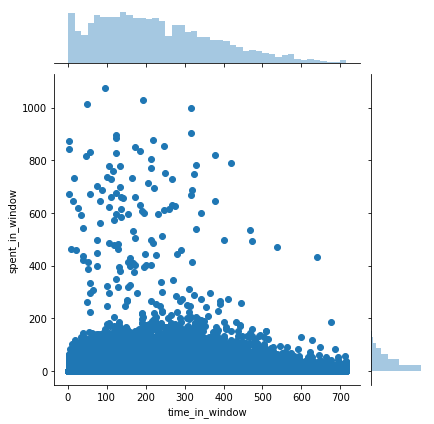

In [68]:
sns.jointplot(x='time_in_window',y='spent_in_window', data= users_sub)

In [111]:
bins = pd.cut(users_sub_norm['age'], bins=10)
users_sub_norm['age_group'] = bins

In [119]:
idx = pd.IndexSlice
users_sub_norm.groupby('age_group').describe().transpose().loc[idx[['in_window_out_window_ratio', 'spent_in_window_norm', 'spent_no_window_norm'],idx['count','mean', '50%']],:]

age_group                         (17.9, 28.0]  (28.0, 38.0]  (38.0, 48.0]  \
spent_in_window_norm       count   1445.000000   1473.000000   2170.000000   
                           mean       0.452509      0.364479      0.355364   
                           50%        0.099553      0.131515      0.151888   
spent_no_window_norm       count   1445.000000   1473.000000   2170.000000   
                           mean       0.093093      0.108290      0.125451   
                           50%        0.040922      0.049758      0.083331   
in_window_out_window_ratio count   1341.000000   1371.000000   1987.000000   
                           mean       5.654582      6.194696      4.285257   
                           50%        2.611386      2.432822      2.138777   

age_group                         (48.0, 58.0]  (58.0, 68.0]  (68.0, 78.0]  \
spent_in_window_norm       count   3503.000000   3108.000000   1907.000000   
                           mean       0.860750      0.540993   

In [108]:
users_sub_norm[['spent_in_window_norm', 'spent_no_window_norm', 'in_window_out_window_ratio']] = users_sub_norm[['spent_in_window_norm', 'spent_no_window_norm', 'in_window_out_window_ratio']].replace([np.inf, -np.inf], np.nan)

In [109]:
users_sub_norm.loc[~users_sub_norm['in_window_out_window_ratio'].isna(),['spent_in_window_norm', 'spent_no_window_norm', 'in_window_out_window_ratio']]

,spent_in_window_norm,spent_no_window_norm,in_window_out_window_ratio
0,0.276847,0.160116,1.729042
1,0.000000,0.007113,0.000000
2,0.094652,0.127395,0.742979
3,0.270310,0.275963,0.979517
4,0.532793,0.109274,4.875767
5,0.127243,0.036829,3.454985
6,0.443784,0.031818,13.947490
7,0.290000,0.164265,1.765440
8,0.863898,0.410435,2.104837
10,0.473552,0.107842,4.391148


(-20, 20)

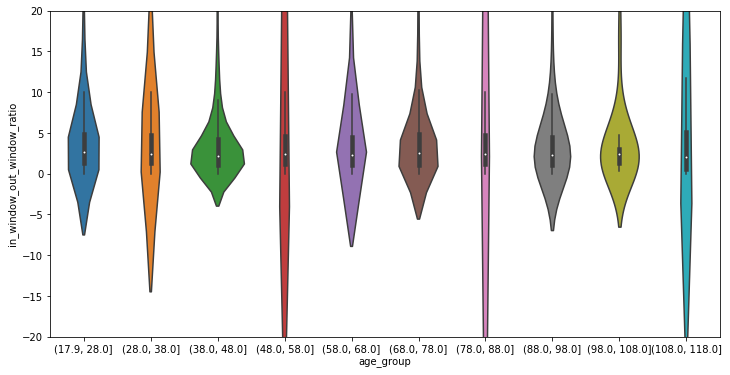

In [118]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(x ='age_group', y= 'in_window_out_window_ratio', data=users_sub_norm.loc[~users_sub_norm['in_window_out_window_ratio'].isna(),:], whis='range', ax=ax)
plt.ylim(-20,20)


(-1, 10)

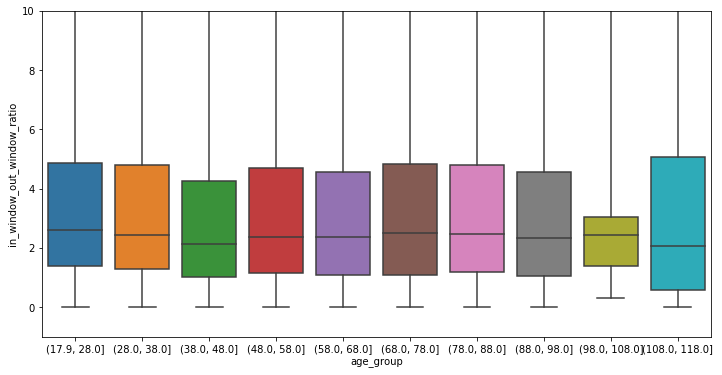

In [122]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x ='age_group', y= 'in_window_out_window_ratio', data=users_sub_norm.loc[~users_sub_norm['in_window_out_window_ratio'].isna(),:], whis='range', ax=ax)
plt.ylim(-1,10)

In [171]:
users_sub_spec = users.loc[:,subset2_min_spec]
bins = pd.cut(users_sub_norm['age'], bins=5)
users_sub_spec['age_group'] = bins

In [172]:
idx = pd.IndexSlice
users_sub_spec.groupby(['gender', 'age_group']).describe().loc[idx[:,:],idx[:,idx['mean']]]

spent_no_window_norm spent_in_discount_norm  \
                                     mean                   mean   
gender age_group                                                   
F      (17.9, 38.0]              0.140939               0.648141   
       (38.0, 58.0]              0.162835               0.836052   
       (58.0, 78.0]              0.164049               0.945240   
       (78.0, 98.0]              0.159577               0.776617   
       (98.0, 118.0]             0.197520               1.156278   
M      (17.9, 38.0]              0.083342               0.358979   
       (38.0, 58.0]              0.118365               0.549912   
       (58.0, 78.0]              0.123719               0.585526   
       (78.0, 98.0]              0.138350               0.601721   
       (98.0, 118.0]             0.222932               3.143446   
N      (98.0, 118.0]             0.022164               0.052158   
O      (17.9, 38.0]              0.112406               0.901695   
       (38.0, 58.0]              0.140550               1.190716   
       (58.0, 78.0]              0.156831               0.508566   
       (78.0, 98.0]              0.095304               1.214592   
       (98.0, 118.0]             0.201934               0.000000   

                     spent_in_bogo_norm spent_in_informational_norm  
                                   mean                        mean  
gender age_group                                                     
F      (17.9, 38.0]            1.083991                    0.131951  
       (38.0, 58.0]            1.149504                    0.151179  
       (58.0, 78.0]            0.933763                    0.124839  
       (78.0, 98.0]            0.763765                    0.136389  
       (98.0, 118.0]           1.219802                    0.128926  
M      (17.9, 38.0]            0.448301                    0.071912  
       (38.0, 58.0]            0.679688                    0.106143  
       (58.0, 78.0]            0.649554                    0.106022  
       (78.0, 98.0]            0.576364                    0.114277  
       (98.0, 118.0]           1.387422                    0.000000  
N      (98.0, 118.0]           0.082669                    0.021159  
O      (17.9, 38.0]            1.316926                    0.098633  
       (38.0, 58.0]            0.652994                    0.092817  
       (58.0, 78.0]            0.749467                    0.199857  
       (78.0, 98.0]            0.168164                    0.028517  
       (98.0, 118.0]           0.810222                    0.464694

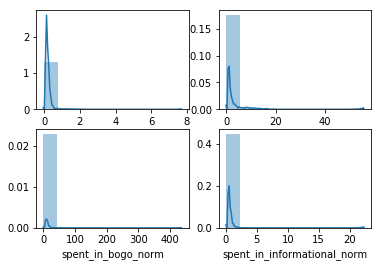

In [173]:
fig, axs = plt.subplots(2,2)

sns.distplot(users_sub_spec.loc[:,'spent_no_window_norm'], bins = 10, ax= axs[0,0])
sns.distplot(users_sub_spec.loc[:,'spent_in_discount_norm'], bins = 10, ax= axs[0,1])
sns.distplot(users_sub_spec.loc[:,'spent_in_bogo_norm'], bins = 10, ax= axs[1,0])
sns.distplot(users_sub_spec.loc[:,'spent_in_informational_norm'], bins = 10, ax= axs[1,1])


(0, 4)

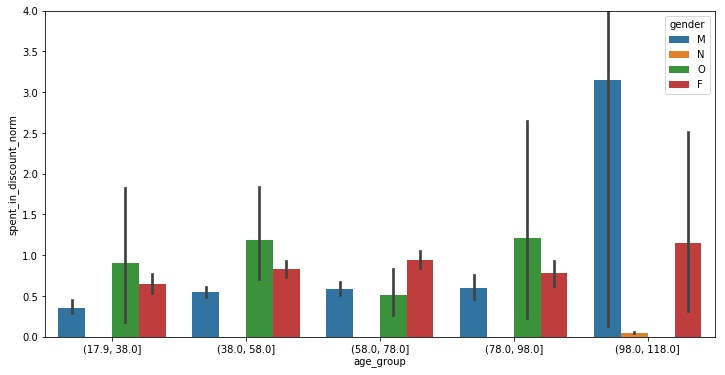

In [175]:
fig , ax = plt.subplots(figsize=(12,6))
sns.barplot(x='age_group', y='spent_in_discount_norm', hue='gender', data=users_sub_spec, ax= ax)
plt.ylim(0,4)

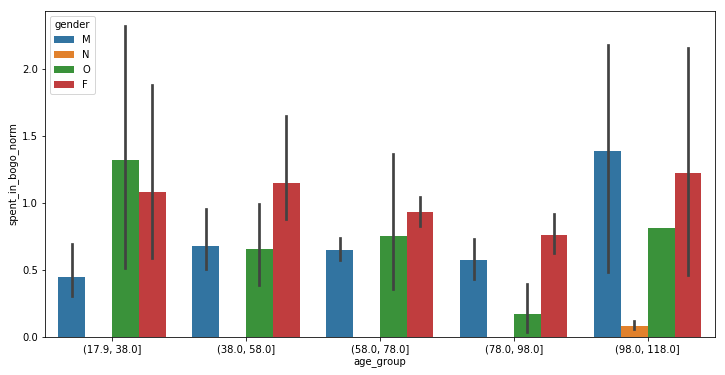

In [176]:
fig , ax = plt.subplots(figsize=(12,6))
sns.barplot(x='age_group', y='spent_in_bogo_norm', hue='gender', data=users_sub_spec, ax= ax)


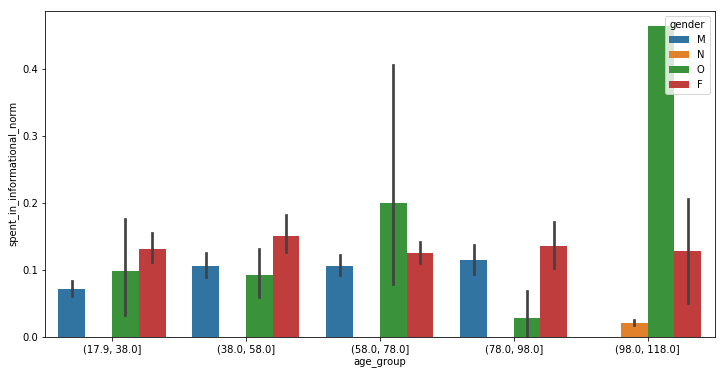

In [177]:
fig , ax = plt.subplots(figsize=(12,6))
sns.barplot(x='age_group', y='spent_in_informational_norm', hue='gender', data=users_sub_spec, ax= ax)
